**`Airbnb Data Analysis`**

**Context:**

The **Airbnb dataset** contains detailed information about listings, hosts, and customer reviews across multiple locations. Airbnb operates in a highly competitive and dynamic industry where understanding customer preferences, pricing strategies, and location-based demand is crucial for maintaining a competitive edge. 

**Objective:**
The specific objective of this analysis include:

* **Understanding the Key Factors Influencing Pricing:**
* **Customer Satisfaction and Reviews:**
* **Exploring Geographical Demand and Location Patterns:**
* **Predicting Booking Likelihood and Pricing:**
* **Evaluating the Role of Host Characteristics:**

**Approach and Methodology:**

* **Data Cleaning and Preprocessing**
* **Exploratory Data Analysis (EDA)**
* **Correlation and Feature Importance**
* **Data Visualisation**

**1.Know Your Data!**

**import necessary libraries**

In [2]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                #import essential libraries
import numpy as np
import pandas as pd

#Importing Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

**Load Dataset**

In [117]:
#using 'pd.read_csv' function to load csv file, it takes a file path or URL as an 
#input, and returns a DataFrame that contains the data from the CSV file

df=pd.read_csv('ab.csv')

**Dataset First View**

In [6]:
#datset first look
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**Dataset Rows & Columns count**

In [8]:
# Dataset Rows(observation) & Columns count(features)
print(df.shape)

(48895, 16)


**Dataset Information**

In [16]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**Duplicate Values**

In [21]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

**Missing Values/Null Values**

In [25]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [21]:
# Missing Values/Null Values Count
df.isnull().sum()
     

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

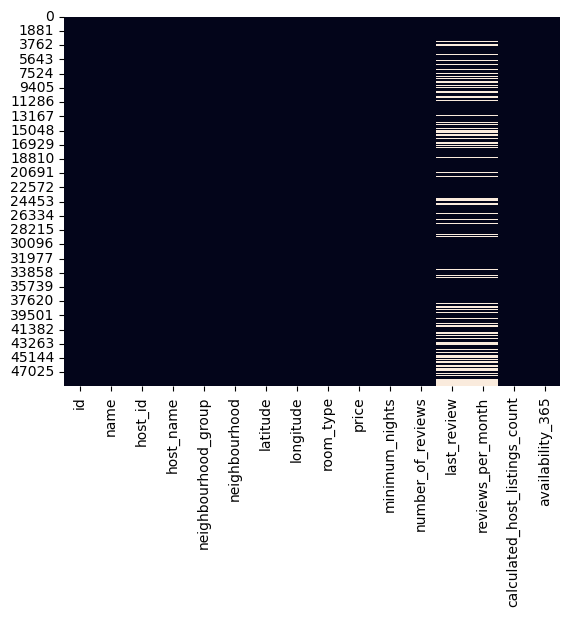

In [23]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False);

In [24]:
# Missing Value Count Function
def showMissing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

missingVal = pd.DataFrame()
missingVal['Missing Data Count'] = df[showMissing()].isnull().sum().sort_values(ascending = False)
missingVal['Missing Data Percentage'] = df[showMissing()].isnull().sum().sort_values(ascending = False)/len(df)*100

print(missingVal)

                   Missing Data Count  Missing Data Percentage
last_review                     10052                20.558339
reviews_per_month               10052                20.558339
host_name                          21                 0.042949
name                               16                 0.032723


**What did you know about your dataset?**

These observation can be concluded from the above analysis:

**1.** There are 48895 observation and 16 features with a mixture of interger, float and object data type i.e., contains both numerical and categorial feature.

**2.** Last_review feature is a date but has object data type, need to change it to correct data type.

**3.** Dataset contains all unique value i.e., there is no duplicate which means data is free from bias as duplicates can cause problems in downstream analyses, such as biasing results or making it difficult to accurately summarize the data.

**4.** Some of the features like name, host_name, last_review and reviews_per_month has null values.

**Understanding Your Variables**

In [29]:
# Dataset Columns
print("Features",df.columns.to_list())

Features ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [31]:
# Dataset Describe
df.describe()
     

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**Variables Description**

* **id:** Unique identifier for each listing.
* **name:** The name of the listing.
* **host_id:** Unique identifier for the host of the listing.
* **host_name:** Name of the host.
* **neighbourhood_group:** The group or region that the listing belongs to (e.g., city, neighborhood).
* **neighbourhood:** The exact neighborhood or district where the listing is located.
* **latitude:** The latitude coordinate of the listing.
* **longitude:** The longitude coordinate of the listing.
* **room_type:** The type of room available for booking (e.g., Entire home/apt, Private room, Shared room).
* **price:** The nightly price for the listing (usually in USD or the local currency).
* **minimum_nights:** The minimum number of nights required to book the listing.
* **number_of_reviews:** The total number of reviews the listing has received.
* **last_review:** The date when the most recent review was posted.
* **reviews_per_month:** Average number of reviews that a listing receives per month
* **calculated_host_listings_count:** Total number of listings that a host has on the Airbnb platform
* **availability_365:** The number of days in a year that a listing is available for booking on the Airbnb platform based on the listing's calendar, and reflects the number of days in the future that the listing is marked as available for booking.

**Check Unique Values for each variable**

In [35]:
# Check Unique Values for each variable.
# df.nunique()
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())
     

No. of unique values in id is 48895
No. of unique values in name is 47905
No. of unique values in host_id is 37457
No. of unique values in host_name is 11452
No. of unique values in neighbourhood_group is 5
No. of unique values in neighbourhood is 221
No. of unique values in latitude is 19048
No. of unique values in longitude is 14718
No. of unique values in room_type is 3
No. of unique values in price is 674
No. of unique values in minimum_nights is 109
No. of unique values in number_of_reviews is 394
No. of unique values in last_review is 1764
No. of unique values in reviews_per_month is 937
No. of unique values in calculated_host_listings_count is 47
No. of unique values in availability_365 is 366


**Data Wrangling**

In [38]:
#changing data type for last review 
df.loc[:,'last_review'] = pd.to_datetime(df['last_review'], infer_datetime_format=True)

#calculating total count of observation where number of review is equal to 0
len(df[df['number_of_reviews']== 0])

/var/folders/cp/23sbnskd335_jqg5857fjv1c0000gn/T/ipykernel_43057/1149731447.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df.loc[:,'last_review'] = pd.to_datetime(df['last_review'], infer_datetime_format=True)


10052

#replacing null values with possible data

#categorial value like name and host name is replace with not known 
df['name'].fillna('not known',inplace = True)
df['host_name'].fillna('not known',inplace = True)

#replacing numerical value for reviews per month with 0 as number of review is 0 for those values
df['reviews_per_month'].fillna(0,inplace = True)

In [103]:

df.isnull().sum()
     


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [43]:
# Calculate the median of the feature price
median = df['price'].median()

# Replace 0 with the median
df['price'].replace(0, median, inplace=True)

/var/folders/cp/23sbnskd335_jqg5857fjv1c0000gn/T/ipykernel_43057/2750110315.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].replace(0, median, inplace=True)


**Pricing and Revenue Analysis**

**`How do features like location, room type affect the price?`**

**Location**

In [47]:
a= df['latitude'].corr(df['price'])
b= df['longitude'].corr(df['price'])
print('Correlation between Latitude and Price=',a)
print('Correlation between Longitude and Price=',b)

Correlation between Latitude and Price= 0.03390930817778991
Correlation between Longitude and Price= -0.1499684437039749


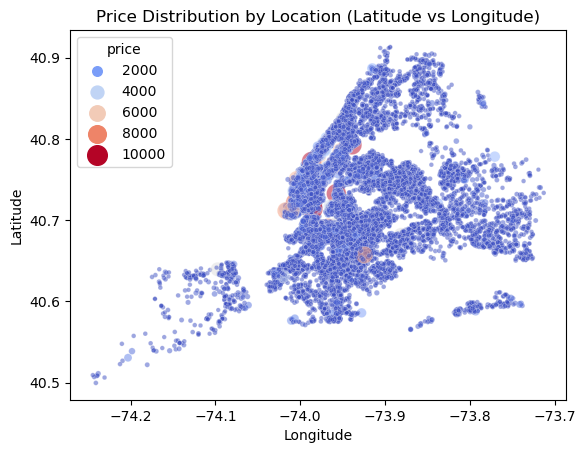

In [64]:
sns.scatterplot(data=df, x='longitude', y='latitude', hue='price', palette='coolwarm', size='price', sizes=(10, 200), alpha=0.5)
plt.title('Price Distribution by Location (Latitude vs Longitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


**Observation:**
The latitude and longitude are weakly correlated with the price. Thus, it appears that geographical location based on latitude and longitude does not play an important role in determining the price of the item in the dataset. The location effect on the price may be more subtle, depending on several other factors

**Room type**

In [69]:
a= df.groupby('room_type')['price'].mean()
print(a)

room_type
Entire home/apt    211.802590
Private room        89.814208
Shared room         70.310345
Name: price, dtype: float64


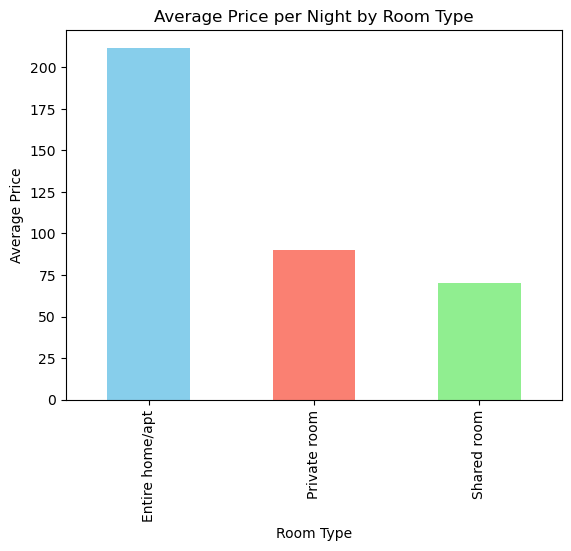

In [71]:
a.plot(kind='bar',  color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Average Price per Night by Room Type')
plt.ylabel('Average Price')
plt.xlabel('Room Type')
plt.show()

**Observation:**
* Entire home/apt is the most expensive option. This is because guests are renting an entire property, often with more space, privacy, and additional amenities. 
* Private rooms are less expensive than entire properties because they only provide a private room within a shared property.
* Shared rooms are the least expensive option. In this case, guests share a room (and possibly the bed) with other people.

**`Are there specific neighborhood with higher price ranges, and why?`**

In [73]:
a= df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
a

neighbourhood
Fort Wadsworth    800.000000
Woodrow           700.000000
Tribeca           490.638418
Sea Gate          487.857143
Riverdale         442.090909
                     ...    
New Dorp           57.000000
Soundview          53.466667
Tremont            51.545455
Hunts Point        50.500000
Bull's Head        47.333333
Name: price, Length: 221, dtype: float64

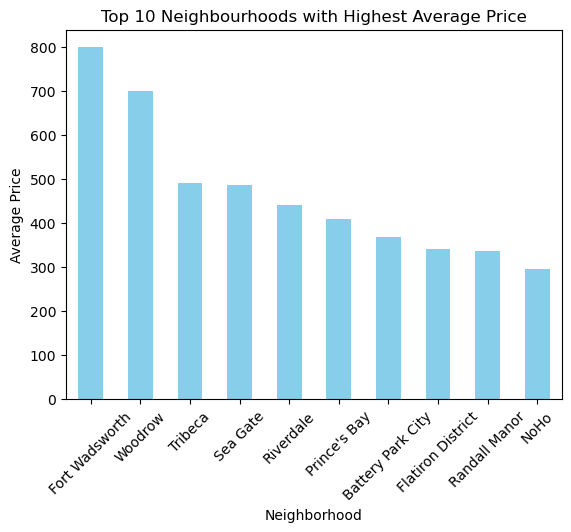

In [75]:
b =a.head(10)
b.plot(kind='bar', color='skyblue')
plt.title('Top 10 Neighbourhoods with Highest Average Price')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

**Observation:**
* The average prices of Fort Wadsworth and Woodrow are exceptionally high, which can mean that they have luxury listings, spacious homes, or properties that possess unique features.
* New Dorp, Soundview, and Bull's Head are the cheapest, with the lowest average prices. These could be located at a distance from places of tourist attraction or business centers, have less amenities, or attract a more budget-conscious traveling population.

**`Does the number of reviews correlate with the price of a listing?`**

In [78]:
c= df['price'].corr(df['number_of_reviews'])
print("Correlation between number of reviews and price:",c)

Correlation between number of reviews and price: -0.04793168871433839


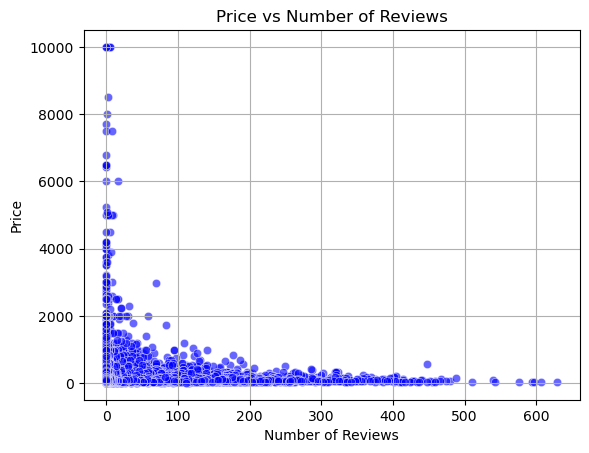

In [80]:
sns.scatterplot(x='number_of_reviews', y='price', data=df, color='blue', alpha=0.6)
plt.title('Price vs Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.grid(True)
plt.show()

**Observation:**
There appears to be a negative correlation between price and number of reviews.This means that as the price increases,the number of reviews tends to decrease.

**`How does the availability of a listing throughout the year (availability_365) relate to its price?`**

In [84]:
c= df['price'].corr(df['availability_365'])
print("Correlation between price and availability_365:",c)

Correlation between price and availability_365: 0.08183833425014948


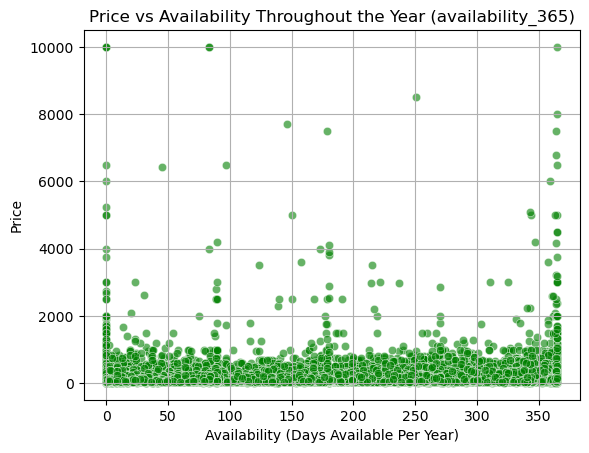

In [86]:
sns.scatterplot(x='availability_365', y='price', data=df, color='green', alpha=0.6)
plt.title('Price vs Availability Throughout the Year (availability_365)')
plt.xlabel('Availability (Days Available Per Year)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

**`Are listings with higher availability typically priced differently than those with limited availability?`**

In [89]:
df= df[['price', 'availability_365']].dropna()
df['a_category'] = df['availability_365'].apply(
    lambda x: 'High Availability' if x >= 200 else 'Low Availability'
)
a= df.groupby('a_category')['price'].mean()
print(a)

a_category
High Availability    180.331912
Low Availability     142.364033
Name: price, dtype: float64


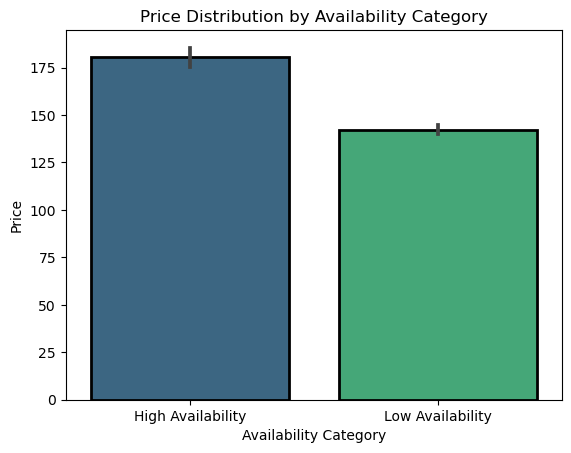

In [93]:
sns.barplot(x='a_category', y='price', data=df,palette='viridis',linewidth=2,edgecolor='black')
plt.title('Price Distribution by Availability Category')
plt.xlabel('Availability Category')
plt.ylabel('Price')
plt.show()

**Observation:**
* Listings with higher availability (≥ 200 days per year) tend to be priced higher on average than listings with lower availability (< 100 days per year).

**`How do seasonal pricing trends impact Airbnb prices?`**

In [119]:
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
df['month'] = df['last_review'].dt.month
df['season'] = df['month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else 'Spring' if x in [3, 4, 5] else 'Summer' if x in [6, 7, 8] else 'Fall'
)
df1= df[['price', 'season']].dropna()
a = df1.groupby('season')['price'].mean()
a

season
Fall      178.346512
Spring    138.154483
Summer    140.516350
Winter    154.675325
Name: price, dtype: float64

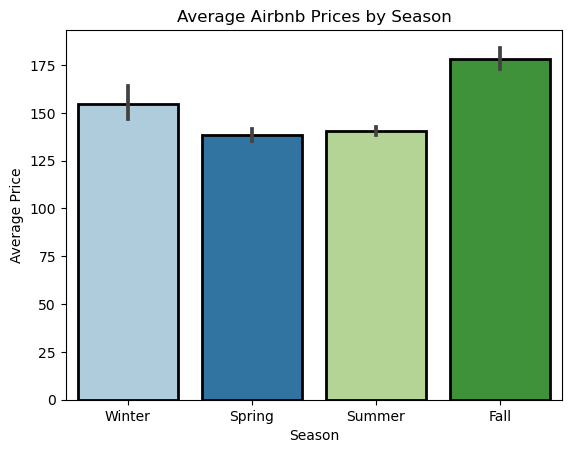

In [121]:
sns.barplot(x='season', y='price', data=df1, order=['Winter', 'Spring', 'Summer', 'Fall'],palette="Paired",linewidth=2,edgecolor='black')
plt.title('Average Airbnb Prices by Season')
plt.xlabel('Season')
plt.ylabel('Average Price')
plt.show()

**Observation:**
* Fall is the most expensive season, with an average price of 178.35. This could be due to factors like special events, cultural festivals.
* Spring and Summer both have relatively lower average prices (138.15 and 140.52, respectively).
* Winter has an average price of 154.68, which is higher than both Spring and Summer. This suggests that Winter could be a peak season for destinations with winter tourism

**`Are there areas with high booking rates but lower prices?`**

In [123]:
a= df.groupby('neighbourhood').agg({'price': 'mean', 'number_of_reviews': 'mean'})
h= a.sort_values(by='number_of_reviews', ascending=False)
h= h[h['price'] < h['price'].quantile(0.75)]
print(h.head(10))

                          price  number_of_reviews
neighbourhood                                     
Silver Lake           70.000000         118.500000
East Elmhurst         81.183784          81.659459
Richmondtown          78.000000          79.000000
Eltingville          141.666667          76.000000
Mount Eden            58.500000          70.000000
Springfield Gardens   94.235294          69.094118
Tompkinsville         76.190476          57.142857
Huguenot             118.333333          55.666667
Manhattan Beach      103.500000          50.625000
Highbridge            71.111111          48.814815


**Observation:**
* Some neighborhoods are experiencing price increases, while others are seeing price decreases. The neighborhoods with significant price drops (e.g., Eltingville, Springfield Gardens, Huguenot, Manhattan Beach) could be facing a variety of challenges
* neighborhoods with price increases (e.g., Silver Lake, Mount Eden) might be experiencing gentrification, increased demand due to new attractions or amenities

**`What factors contribute to higher customer satisfaction (review scores) for a listing?`**

In [127]:
a= df.select_dtypes(include=[float, int])
c= a.corr()
print(c)

                                      id   host_id  latitude  longitude  \
id                              1.000000  0.588290 -0.003125   0.090908   
host_id                         0.588290  1.000000  0.020224   0.127055   
latitude                       -0.003125  0.020224  1.000000   0.084788   
longitude                       0.090908  0.127055  0.084788   1.000000   
price                           0.010619  0.015309  0.033939  -0.150019   
minimum_nights                 -0.013224 -0.017364  0.024869  -0.062747   
number_of_reviews              -0.319760 -0.140106 -0.015389   0.059094   
reviews_per_month               0.291828  0.296417 -0.010142   0.145948   
calculated_host_listings_count  0.133272  0.154950  0.019517  -0.114713   
availability_365                0.085468  0.203492 -0.010983   0.082731   
month                          -0.051368 -0.030284 -0.002245   0.000772   

                                   price  minimum_nights  number_of_reviews  \
id                  

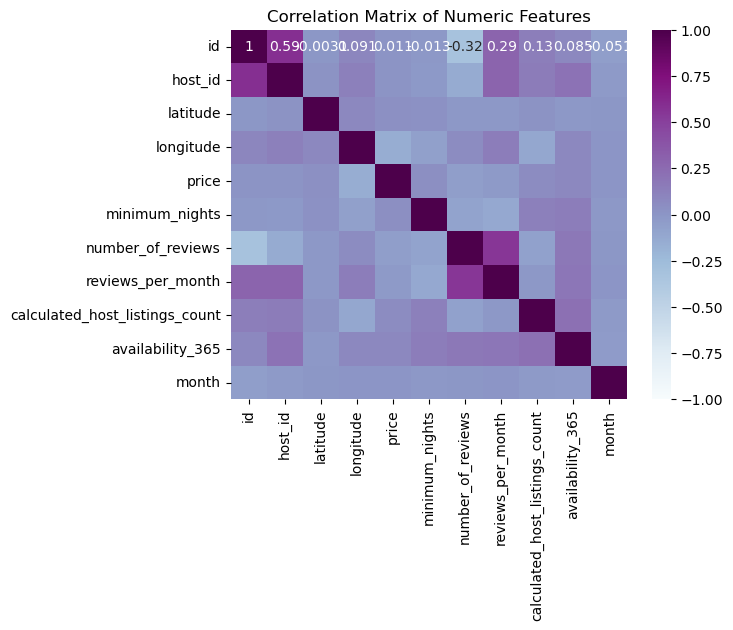

In [129]:
sns.heatmap(c, annot=True, cmap='BuPu', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

**Observation:**
* Location (Latitude & Longitude): Location, on the basis of latitude and longitude, has minimum impact on the price. Correlations are poor, and these suggest that just geographical factors aren't the very strong price movers in this set of data.
* Number of Reviews and Reviews per Month: Reviews did not have an impact on a listing's price. Negative correlation between number of reviews with price is almost very weak with a similar degree of relationship about reviews per month.
* Minimum Nights: There's a small, positive correlation that exists between the minimum nights for a stay, and price-meaning that prices might be priced a little more for those types of listings when requiring longer stay.
* Host Experience: A host listing in more extensive portfolios may, very weakly, charge a bit of premium. Again, this suggests the possibility that experience or just sheer portfolio size and scale will determine higher priced offers, by virtue of reputation or more likely better listings.
* Availability 365: There is a weak positive correlation between price and availability. Listings that are available more often throughout the year might be a little bit more expensive, maybe because they are in higher demand or because the host is more involved with the platform.


**`How do minimum night requirements affect booking rates?`**

**By correlation Analysis**

In [134]:
c= df[['minimum_nights', 'number_of_reviews', 'reviews_per_month']].corr()
print(c)

                   minimum_nights  number_of_reviews  reviews_per_month
minimum_nights           1.000000          -0.080116          -0.121702
number_of_reviews       -0.080116           1.000000           0.549868
reviews_per_month       -0.121702           0.549868           1.000000


**By grouping method**

In [136]:
df['mnc'] = pd.cut(df['minimum_nights'], bins=[0, 3, 7, 30, 100], labels=['Short', 'Medium', 'Long', 'Extended'])
a= df.groupby('mnc')[['number_of_reviews', 'reviews_per_month', 'availability_365']].mean()
print(a)

          number_of_reviews  reviews_per_month  availability_365
mnc                                                             
Short             28.628197           1.671570        107.043252
Medium            16.409096           0.816855         80.126271
Long               7.878986           0.484880        178.705588
Extended          10.821990           0.556543        168.671902


/var/folders/cp/23sbnskd335_jqg5857fjv1c0000gn/T/ipykernel_43057/2985057104.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a= df.groupby('mnc')[['number_of_reviews', 'reviews_per_month', 'availability_365']].mean()


**By visualisation**

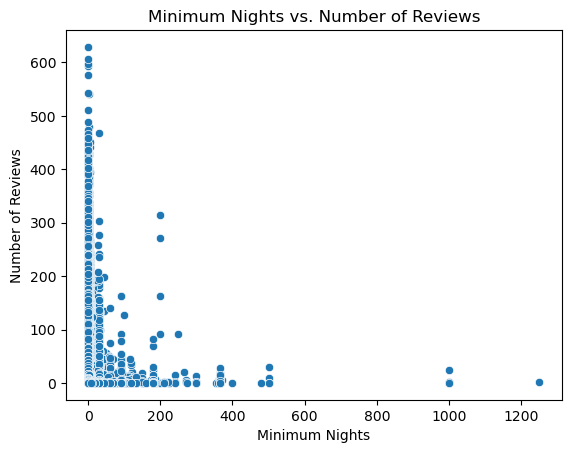

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


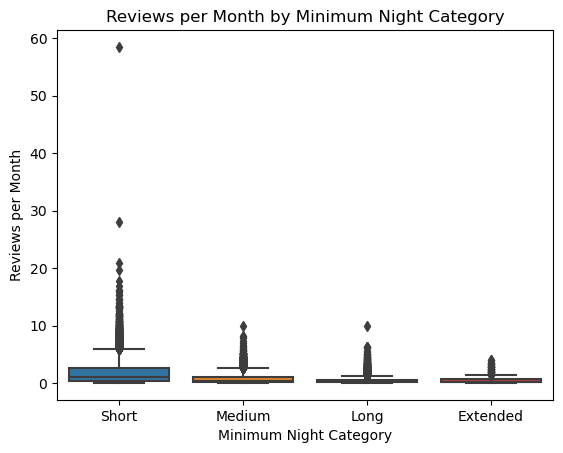

In [140]:
sns.scatterplot(x='minimum_nights', y='number_of_reviews', data=df)
plt.title('Minimum Nights vs. Number of Reviews')
plt.xlabel('Minimum Nights')
plt.ylabel('Number of Reviews')
plt.show()

sns.boxplot(x='mnc', y='reviews_per_month', data=df)
plt.title('Reviews per Month by Minimum Night Category')
plt.xlabel('Minimum Night Category')
plt.ylabel('Reviews per Month')
plt.show()


**Observation:**
* Short Minimum Nights (1-3 nights) have the highest booking activity as indicated by the highest reviews, reviews per month, and moderate availability. This indicates short stays are a better option to guests who may require flexibility for their stay, hence more bookings.
* Medium Minimum Nights (4-7 nights) still get bookings, but at a much lower rate than short-stay listings. It probably appeals to travelers who want to stay a little longer than just a few days (weekend getaways or extended business trips).
* Long Minimum Nights (8-30 nights) have much less booking activity. These listings receive fewer reviews and lower reviews per month, so longer stays tend to be in less demand; therefore, guests are fewer, and bookings happen less often, but they appeal to specific kinds of guests like business travelers, families, or digital nomads.
* Extended Minimum Nights (30+ nights) have even fewer reviews, as these listings are more specialized and more for long-term stays. The booking rate is lower, but the higher availability indicates that these listings could be attractive for certain guest segments, such as relocations or extended vacations.

**`What is the average price of Airbnb listings in the dataset?`**

In [145]:
avg= df['price'].mean()
print("The average price of Airbnb listings is:",avg)


The average price of Airbnb listings is: 152.7206871868289


**`What is the most common room type among Airbnb listings?`**

In [148]:
a= df['room_type'].mode()[0]
print("The most common room type is:",a)

The most common room type is: Entire home/apt


**`What is the average number of reviews per month for listings with reviews?`**

In [151]:
l= df[df['reviews_per_month'] > 0]
avg = l['reviews_per_month'].mean()
print("The average number of reviews per month for listings with reviews is",avg)

The average number of reviews per month for listings with reviews is 1.3732214298586618


**`How has the availability of listings changed over time?`**

In [154]:
df['last_review'] = pd.to_datetime(df['last_review'])  
df['year'] = df['last_review'].dt.year  
df['month'] = df['last_review'].dt.month 
avg = df.groupby('year')['availability_365'].mean()
print(avg)


year
2011.0     70.714286
2012.0    153.160000
2013.0    125.395833
2014.0     67.211055
2015.0     30.888011
2016.0     31.080163
2017.0     43.502964
2018.0     79.581983
2019.0    146.400849
Name: availability_365, dtype: float64


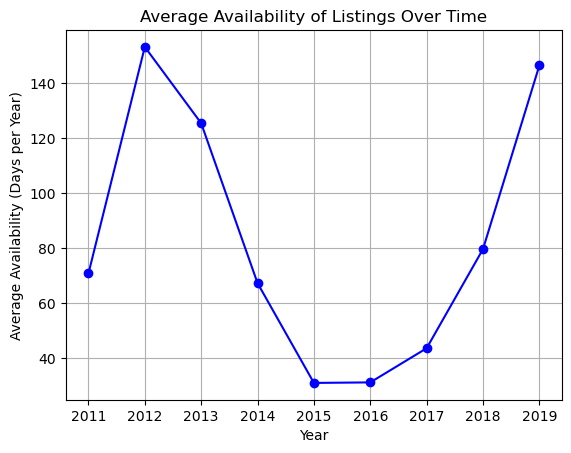

In [158]:
avg.plot(kind='line', marker='o', color='b')
plt.title("Average Availability of Listings Over Time")
plt.xlabel("Year")
plt.ylabel("Average Availability (Days per Year)")
plt.grid(True)
plt.show()


**Observation:**
* Decreasing Availability: Between 2014 and 2016, availability drastically decreased,
* Recovery and Fluctuations: Starting in 2018, there is a recovery in availability, particularly in 2019, which might indicate that more hosts were offering their listings

**`Who are the top 10 hosts with the most listings?`**

In [163]:
h= df.groupby('host_id')['id'].count()
t= h.sort_values(ascending=False).head(10)
print(t)

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
1475015       52
Name: id, dtype: int64


**`What is the average number of listings per host?`**

In [166]:
h= df.groupby('host_id')['id'].count()
avg= h.mean()

print("The average number of listings per host is=",avg)

The average number of listings per host is= 1.3053634834610353


**`What are the most popular neighborhoods for Airbnb rentals in New York City? How do prices and availability vary by neighborhood?`**

In [183]:
a= df['neighbourhood'].value_counts()
t= a.head(10)
print("Top 10 Most Popular Neighborhoods based on the number of listings:")
print(t)

Top 10 Most Popular Neighborhoods based on the number of listings:
neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: count, dtype: int64


In [171]:
n = df.groupby('neighbourhood')[['price', 'availability_365']].agg(['mean', 'median'])
print("Average price and availability per neighborhood:")
print(n)


Average price and availability per neighborhood:
                      price        availability_365       
                       mean median             mean median
neighbourhood                                             
Allerton          87.595238   66.5       163.666667  163.0
Arden Heights     67.250000   72.5        94.250000   30.5
Arrochar         115.000000   65.0       255.809524  306.0
Arverne          171.779221  125.0       188.428571  159.0
Astoria          117.187778   85.0       109.191111   37.5
...                     ...    ...              ...    ...
Windsor Terrace  138.993631  123.0        81.885350   16.0
Woodhaven         67.170455   52.0       200.920455  224.0
Woodlawn          60.090909   68.0        98.272727   51.0
Woodrow          700.000000  700.0         0.000000    0.0
Woodside          85.097872   60.0       130.217021   89.0

[221 rows x 4 columns]


/var/folders/cp/23sbnskd335_jqg5857fjv1c0000gn/T/ipykernel_43057/1721031790.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='price', y='neighbourhood', data=f, ci=None, estimator='mean', palette='Blues_d')
/var/folders/cp/23sbnskd335_jqg5857fjv1c0000gn/T/ipykernel_43057/1721031790.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='availability_365', y='neighbourhood', data=f, ci=None, estimator='mean', palette='Greens_d')


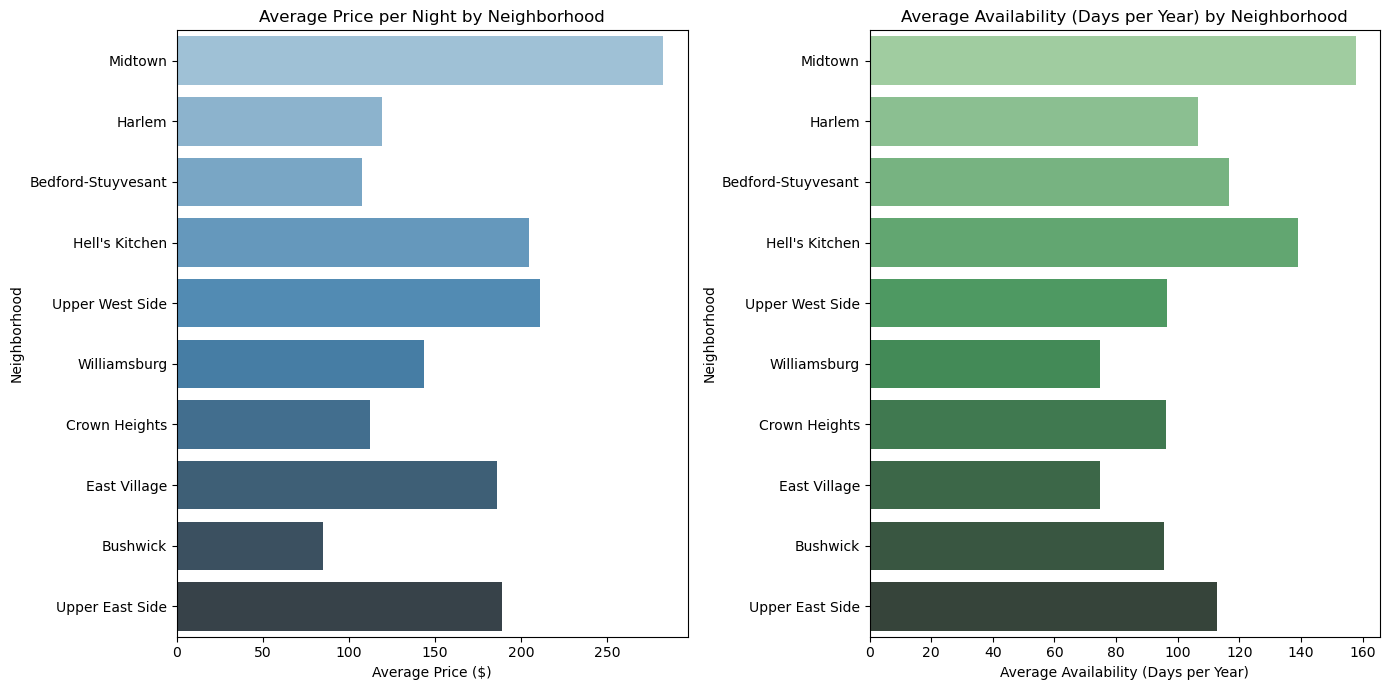

In [187]:
# Plot average price by neighborhood (top 10 most popular neighborhoods)
t= t.index
f= df[df['neighbourhood'].isin(t)]

plt.figure(figsize=(14, 7))

# Plot price by neighborhood
plt.subplot(1, 2, 1)
sns.barplot(x='price', y='neighbourhood', data=f, ci=None, estimator='mean', palette='Blues_d')
plt.title('Average Price per Night by Neighborhood')
plt.xlabel('Average Price ($)')
plt.ylabel('Neighborhood')

# Plot availability by neighborhood
plt.subplot(1, 2, 2)
sns.barplot(x='availability_365', y='neighbourhood', data=f, ci=None, estimator='mean', palette='Greens_d')
plt.title('Average Availability (Days per Year) by Neighborhood')
plt.xlabel('Average Availability (Days per Year)')
plt.ylabel('Neighborhood')

plt.tight_layout()
plt.show()

**`How has the Airbnb market in New York City changed over time? Have there been any significant trends in terms of the number of listings, prices, or occupancy rates?`**

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

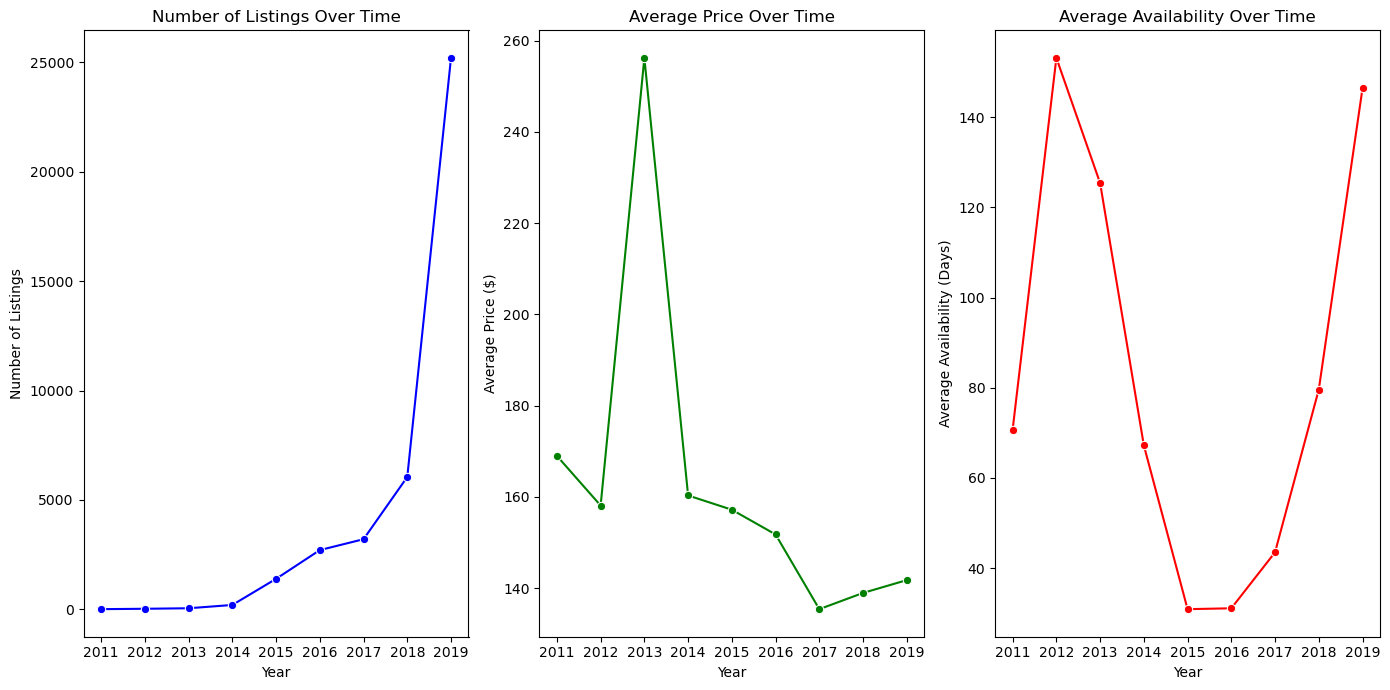

In [191]:
a= df.groupby('year').agg(
    num_listings=('id', 'count'),
    avg_price=('price', 'mean'),
    avg_availability=('availability_365', 'mean')
)
plt.figure(figsize=(14, 7))
plt.subplot(1, 3, 1)
sns.lineplot(x=a.index, y=a['num_listings'], marker='o', color='blue')
plt.title('Number of Listings Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Listings')
plt.subplot(1, 3, 2)
sns.lineplot(x=a.index, y=a['avg_price'], marker='o', color='green')
plt.title('Average Price Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price ($)')
plt.subplot(1, 3, 3)
sns.lineplot(x=a.index, y=a['avg_availability'], marker='o', color='red')
plt.title('Average Availability Over Time')
plt.xlabel('Year')
plt.ylabel('Average Availability (Days)')

plt.tight_layout()
plt.show()


**Observation:**
* **Number of listings** There is a signficant increase in the no of listings from 2011 to 2018,with a slight dip in 2019.
* **Average Price** The average price shows a fluctuating trend with peaks in 2012 and 2017.
* **Average Availability** Avverage availability generally decreases over time with a sharp drop in 2018

**`Are there any patterns or trends in terms of the types of properties that are being rented out on Airbnb in New York City? Are certain types of properties more popular or more expensive than others?`**

In [195]:
a = df['room_type'].value_counts()
print(a)

b= df.groupby('room_type')['price'].mean()
print(b)

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64
room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64


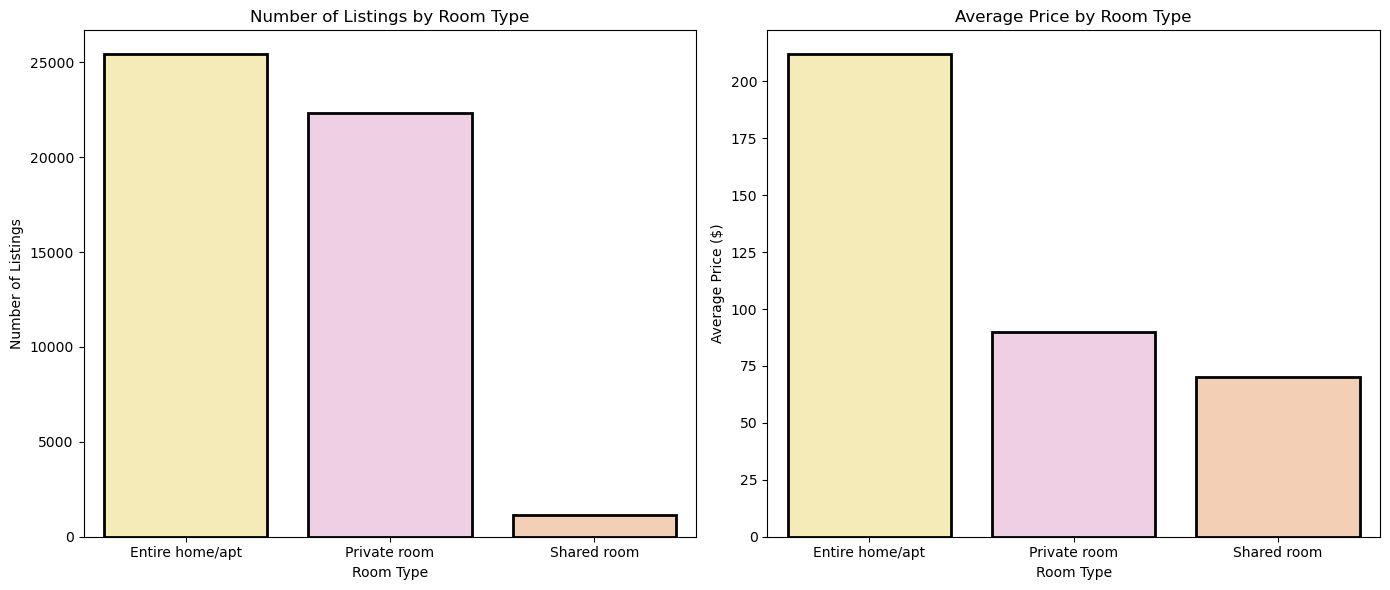

In [197]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=a.index, y=a.values, palette='Pastel2_r',linewidth=2,edgecolor='black')
plt.title('Number of Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')

plt.subplot(1, 2, 2)
sns.barplot(x=b.index, y=b.values, palette='Pastel2_r',linewidth=2,edgecolor='black')
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price ($)')

plt.tight_layout()
plt.show()


**Observation:**
**Room Type Preferences:**

The most common room type is Entire home/apt, followed by Private room. 
Shared rooms are a much smaller segment.


**`How do the lengths of stay for Airbnb rentals in New York City vary by neighborhood? Do certain neighborhoods tend to attract longer or shorter stays?`**

In [201]:
a= df.groupby('neighbourhood')['minimum_nights'].mean().sort_values(ascending=False)
a

neighbourhood
Spuyten Duyvil       48.250000
North Riverdale      41.400000
Battery Park City    30.328571
Olinville            23.500000
Vinegar Hill         18.352941
                       ...    
Woodlawn              1.454545
East Morrisania       1.400000
Oakwood               1.200000
New Dorp              1.000000
Breezy Point          1.000000
Name: minimum_nights, Length: 221, dtype: float64

**`How do the ratings of Airbnb rentals in New York City compare to their prices? Are higher-priced rentals more likely to have higher ratings?`**

-0.03060834856753313


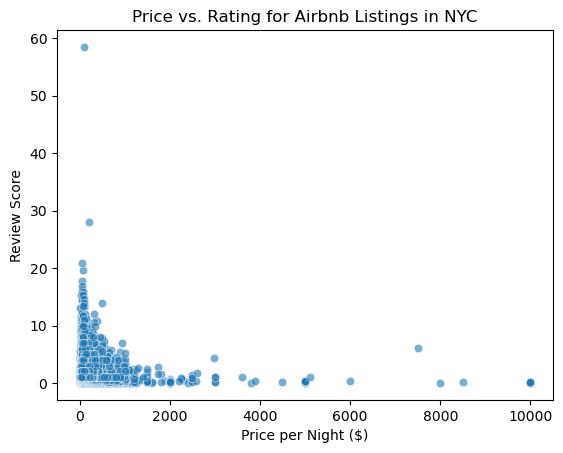

In [204]:
c= df['price'].corr(df['reviews_per_month'])
print(c)

sns.scatterplot(x='price', y='reviews_per_month', data=df, alpha=0.6)
plt.title('Price vs. Rating for Airbnb Listings in NYC')
plt.xlabel('Price per Night ($)')
plt.ylabel('Review Score')
plt.show()

**Observation:**
* The scatter plot illustrates a general trnd where airbnb listings with higher prices tend to have lower review scores.

**`Find the total numbers of Reviews and Maximum Reviews by Each Neighborhood Group.`**

In [208]:
a= df.groupby('neighbourhood')['number_of_reviews'].agg(['sum', 'max'])
print(a.sort_values(by='sum', ascending=False))

                               sum  max
neighbourhood                          
Bedford-Stuyvesant          110352  397
Williamsburg                 85427  404
Harlem                       75962  607
Bushwick                     52514  480
Hell's Kitchen               50227  430
...                            ...  ...
Breezy Point                     5    4
Bay Terrace, Staten Island       3    2
New Dorp                         0    0
Woodrow                          0    0
Fort Wadsworth                   0    0

[221 rows x 2 columns]


**`Find Most reviewed room type in Neighborhood groups per month.`**

In [215]:
r = df.groupby(['neighbourhood', 'room_type'])['reviews_per_month'].sum().reset_index()
a = r.loc[r.groupby('neighbourhood')['reviews_per_month'].idxmax()]
b = a.sort_values(by='reviews_per_month', ascending=False)
print(b[['neighbourhood', 'room_type', 'reviews_per_month']])


          neighbourhood        room_type  reviews_per_month
30   Bedford-Stuyvesant  Entire home/apt            2448.04
234              Harlem     Private room            1782.01
525        Williamsburg     Private room            1749.32
68             Bushwick     Private room            1668.88
236      Hell's Kitchen  Entire home/apt            1434.66
..                  ...              ...                ...
102          Co-op City     Private room               0.49
52         Breezy Point     Private room               0.44
344            New Dorp  Entire home/apt               0.00
205      Fort Wadsworth  Entire home/apt               0.00
536             Woodrow  Entire home/apt               0.00

[221 rows x 3 columns]


**`Find Best location listing/property location for travelers.`**

In [218]:
a= df.groupby('neighbourhood').agg({
    'price': 'mean',
    'number_of_reviews': 'sum',
    'availability_365': 'mean'
}).reset_index()
b= a.sort_values(by=['number_of_reviews', 'price'], ascending=[False, True])
c= b[['neighbourhood', 'price', 'number_of_reviews', 'availability_365']]
print(c.head(10))


          neighbourhood       price  number_of_reviews  availability_365
13   Bedford-Stuyvesant  107.678244             110352        116.634626
214        Williamsburg  143.802806              85427         74.722704
94               Harlem  118.974041              75962        106.577502
28             Bushwick   84.800406              52514         95.550913
95       Hell's Kitchen  204.794178              50227        138.846782
64         East Village  186.083108              44670         74.623853
61          East Harlem  133.198747              36446         98.973142
51        Crown Heights  112.480179              36408         96.020460
202     Upper West Side  210.918316              36058         96.583460
201     Upper East Side  188.948276              31686        112.798109


**`Find also best location listing/property location for Hosts.`**

In [221]:
a= df.groupby('neighbourhood').agg({
    'price': 'mean',                   
    'number_of_reviews': 'sum',       
    'availability_365': 'mean',       
    'calculated_host_listings_count': 'sum' 
}).reset_index()
b= a.sort_values(by=['calculated_host_listings_count', 'price'], ascending=[False, False])
c= b[['neighbourhood', 'price', 'number_of_reviews', 'availability_365', 'calculated_host_listings_count']]
print(c.head(10))


          neighbourhood       price  number_of_reviews  availability_365  \
73   Financial District  225.490591               6931        191.536290   
137         Murray Hill  220.958763               4535        173.321649   
95       Hell's Kitchen  204.794178              50227        138.846782   
127             Midtown  282.719094              19444        157.703560   
191    Theater District  248.013889               4342        201.871528   
34              Chelsea  249.738544              23641        113.995508   
201     Upper East Side  188.948276              31686        112.798109   
202     Upper West Side  210.918316              36058         96.583460   
13   Bedford-Stuyvesant  107.678244             110352        116.634626   
197             Tribeca  490.638418               2034        126.508475   

     calculated_host_listings_count  
73                            85454  
137                           26125  
95                            25169  
127        

**`Find Price variations in NYC Neighborhood groups.`**

In [224]:
p= df.groupby('neighbourhood').agg({
    'price': ['mean', 'std', 'min', 'max'] 
}).reset_index()
p.columns = ['neighbourhood', 'mean_price', 'price_std', 'price_min', 'price_max']
c= p.sort_values(by='mean_price', ascending=False)
print(c.head(10))


         neighbourhood  mean_price    price_std  price_min  price_max
82      Fort Wadsworth  800.000000          NaN        800        800
219            Woodrow  700.000000          NaN        700        700
197            Tribeca  490.638418   856.341720         60       8500
174           Sea Gate  487.857143   626.900159         71       1485
167          Riverdale  442.090909   724.395535         49       2500
157       Prince's Bay  409.500000   561.875728         85       1250
6    Battery Park City  367.557143   974.671043         55       7500
75   Flatiron District  341.925000   345.657831         65       2000
161      Randall Manor  336.000000  1130.121282         13       5000
144               NoHo  295.717949   218.199593         75       1795


**`price point of neighbourhood`**

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


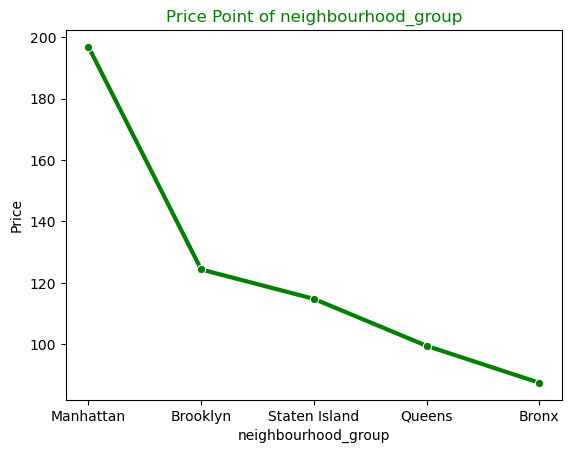

In [233]:
a = df.groupby('neighbourhood_group')['price'].mean().reset_index().sort_values(
    'price',ascending = False)

ax = sns.lineplot(data =a,x='neighbourhood_group', y = 'price',
  marker= 'o', color = 'green',linewidth=3); 
ax.tick_params(axis='both', which='major');
ax.set_xlabel("neighbourhood_group")
ax.set_ylabel("Price")
plt.title('Price Point of neighbourhood_group',color='green')
plt.show()

**`Customer engagment`**

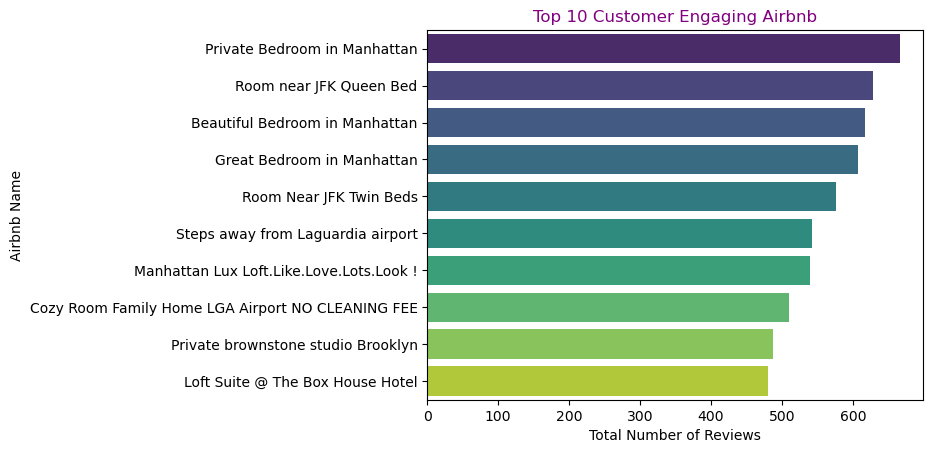

In [236]:
a = df.groupby(['name'])['number_of_reviews'].sum().reset_index().sort_values(
    'number_of_reviews',ascending = False)[:10]
ax = sns.barplot(data =a, y='name', x = 'number_of_reviews',palette='viridis')
ax.tick_params(axis='both', which='major');
ax.set_xlabel("Total Number of Reviews")
ax.set_ylabel("Airbnb Name")
plt.title('Top 10 Customer Engaging Airbnb',color='purple')
plt.show()

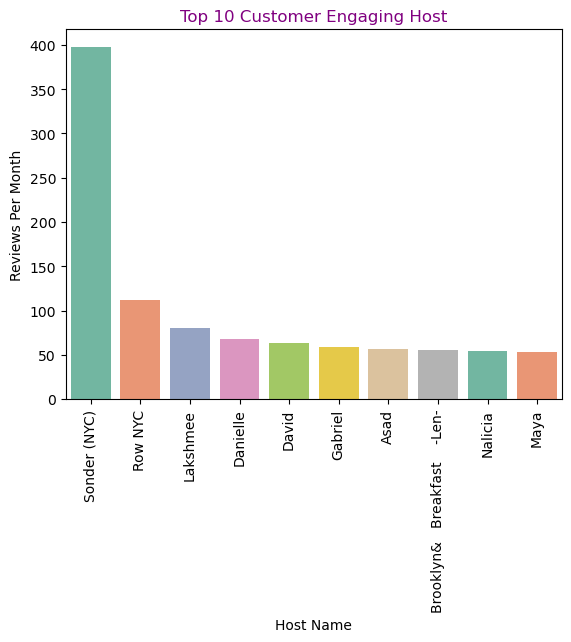

In [240]:
a = df.groupby(['host_id','host_name'])['reviews_per_month'].sum().reset_index().sort_values(
                            'reviews_per_month',ascending = False)[:10]
ax = sns.barplot(data=a,x='host_name', y='reviews_per_month',palette='Set2')
ax.set_xlabel("Host Name")
plt.xticks( rotation = 90)
ax.set_ylabel("Reviews Per Month")
plt.title('Top 10 Customer Engaging Host',color='purple')
plt.show()

**`Price Point for each Room Type in each Neighbourhood group`**

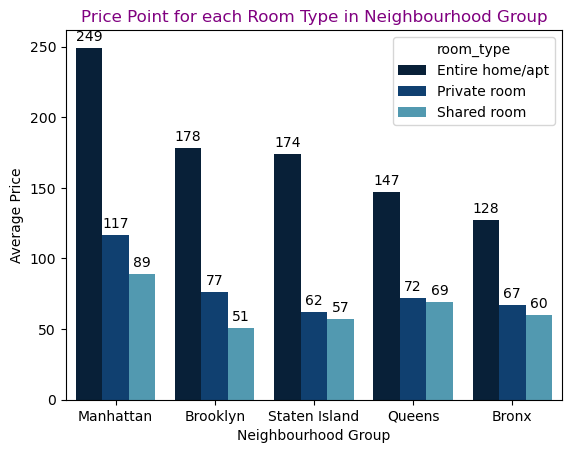

In [245]:
a= df.groupby(['neighbourhood_group','room_type'])[
    'price'].mean().reset_index().sort_values('price',ascending=False)
ax = sns.barplot(data= a,x='neighbourhood_group',y='price',hue='room_type',palette='ocean')
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                    xytext=(0, 8),
                   textcoords='offset points')

ax.tick_params(axis='both', which='major');
ax.set_xlabel("Neighbourhood Group")
ax.set_ylabel("Average Price")
plt.title('Price Point for each Room Type in Neighbourhood Group',color='purple')
plt.show()

**`How does locality affect neighbourhood_group?`**

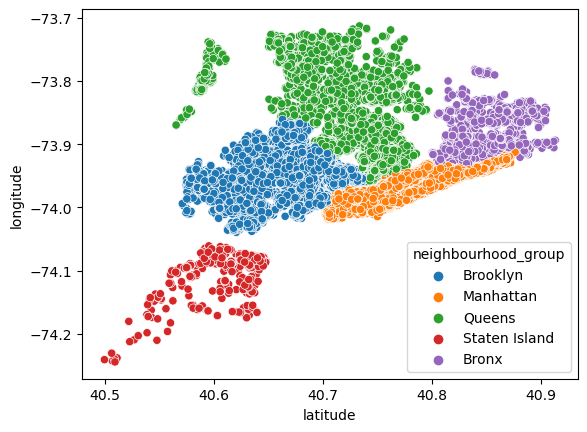

In [248]:
sns.scatterplot(x='latitude',y='longitude',hue='neighbourhood_group',data=df)
plt.show()

**What do you suggest the client to achieve Business Objective ?**

Based on the analysis, it is clear that

* There are host which take 0 booking for entire year and not even available for booking but has high booking price, these listing should be either removed or should undergo physical verification to learn exact reason.
* In order to increase profit for host with less lisitng, special promotional offer should be given and personalised marketing for them should be done from airbnb to promote business in their specific region.
* Price point for few area are relatively high compared to others based on number of listing in the other area, it could be changed.
* Reward for host who provide maximum customer engagement to keep them motivated, this will help in host retention and generation of profit.
* Since private room/apt get maximum reviews per month, therefore, these kind of listing could be increased based on customer demand.

**Conclusion**

From the above analysis, we could conclude that:

* **Average price** distribution for airbnb falls under the range of 1000 i.e., 150-200.
* Amoung all different area **Manhattan**  and Brooklyn has maximum airbnb and Staten Island has least airbnb.
* **Sounder** (NYC) is the most popular host with the highest number of airbnb listings.
* **Price**  which airbnb offer in **Manhattan** is more than others.
* Airbnb listing Room near JFK Queen Bed has maximum number of reviews but when compared with average review per month airbnb listing - Enjoy great views of the City in our Deluxe Room! and host name Sonder (NYC) and Entire home/apt shows maximum customer engagement.
* **Sonder(NYC)** can possibly produce **highest revenue** if booked for entire available day with minimum night booking.
* **Manhattan** has **highest price** point in room type and **Bronx** has **lowest**.